In [1]:
import os

import numpy as np

path_to_json = '/Users/coen/GitHub/Text-mining-AWO-ZL/survey/data/'
csv_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.csv')]
print(csv_files)  # for me this prints ['foo.json']

sentences = []

i = 150

def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

for csv in csv_files:
    # Stop to see error
    i -= 1
    if i <= 0:
        break

    # Opening JSON file
    f = open(path_to_json + csv)

    # returns JSON object as
    # a dictionary
    new_lines = f.readlines()

    # filter all too short sentences
    new_lines = [s for s in new_lines if len(s.split()) > 2]

    # add to list
    sentences = sentences + new_lines

sentences = [s for s in sentences if len(s) < 500]

flat_sentences = sentences
sentences = list(chunks(sentences, 256))

flat_sentences[0:5]

['MGCIOP7409B-ZonderI.csv', 'WHZUDE3(15-11)F-ZonderI.csv', 'JBMEDO116Z-ZonderI.csv', 'DNMOLI12F-ZonderI.csv', 'JBMEDO104Z-ZonderI.csv', 'LZULE5009893Z-ZonderI.csv', 'EVMEDO9B-ZonderI.csv', 'TPMEDO133Z-ZonderI.csv', 'JBMEDO135Z-ZonderI.csv', 'EVMEDO10Z-ZonderI.csv', 'ETMOLI29Z-ZonderI.csv', 'MVMEHA611Z-ZonderI.csv', 'TPMEDO004Z-ZonderI.csv', 'LCZULE5009893B-ZonderI.csv', 'TPMEDO126Z-ZonderI.csv', 'MVMEHA616(V)F-ZonderI.csv', 'LCZULE5012523B-ZonderI.csv', 'JBMEDO108F-ZonderI.csv', 'WHZUDE8B-ZonderI.csv', 'KSENCR105F-ZonderI.csv', 'MVMEHA610Z-ZonderI.csv', 'MGCIOP913F-ZonderI.csv', 'SAENCR109B-ZonderI.csv', 'MGCIOP1763F-ZonderI.csv', 'KSENCR117F-ZonderI.csv', 'MVMEHA616(M)Z-ZonderI.csv', 'BRVILA1Z-ZonderI.csv', 'MGCIOP1763Z-ZonderI.csv', 'KSENCR105Z-ZonderI.csv', 'ASVILA16B-ZonderI.csv', 'MVMEHA610F-ZonderI.csv', 'MGCIOP913Z-ZonderI.csv', 'ASVILA11B-ZonderI.csv', 'KSENCR115B-ZonderI.csv', 'MVMEHA616(V)Z-ZonderI.csv', 'AKENLA41B-ZonderI.csv', 'EVMEDO10F-ZonderIB.csv', 'WHZUDE5B-ZonderI.csv

[' Goed, ik ben heel erg blij en met de NAAM en ben ik voor alles en nog wat. En ik ben altijd blij. \n',
 ' Een enkele wel he. Ik zou niet hebben dat het hier mij komen wonen. Dat zou ik niet leuk vinden. \n',
 ' Nee. Gewoon naar haar gaan en naar een andere en dan heb ik genoeg he. \n',
 ' NAAM heeft hier nou eigenlijk van die hempie, nee ja nee ja maar die kamer is niet van mij he.\n',
 ' Wat zegt ie?\n']

In [ ]:
# Keyword extraction using POS tagging

In [2]:
from transformers import pipeline

classifier = pipeline('token-classification', "GroNLP/bert-base-dutch-cased-upos-alpino")

In [3]:
def entity_weight_func(entity: str):
    if entity == 'NOUN':
        return 1
    # if entity == 'PROPN':
    #     return 1
    # if entity == 'ADJ':
    #     return 1
    # if entity == 'ADV':
    #     return 1
    # if entity == 'VERB':
    #     return 1

    return 0

In [4]:
def get_key_words(sentences):
    result = classifier(sentences)
    
    output = []
    
    for sen in result:
        sen_output = []
        
        for idx in range(len(sen)):
            token = sen[idx]
            
            if entity_weight_func(token['entity']) > 0:
                word = token['word']
                
                if '#' in word:
                    continue
                
                for jdx in range(idx + 1, len(sen)):
                    next_token = sen[jdx]
                    
                    if '#' in next_token['word']:
                        word += next_token['word'].replace('#', '')
                    else:
                        break
                        
                sen_output += [word]
                
        
        # filter words that are anonimised
        sen_output = [word.lower() for word in sen_output if not word.isupper()]
                
        output += [sen_output]
    
    return result, output

In [5]:
from collections import Counter

text = ["ik hou van honden en konijnen", "ik hou van katten en de verpleegkundige", 
        "De verpleegsters helpen me altijd heel fijn met opstaan"]
test_result = get_key_words(text)[1]

test_keyword_list = [item for sublist in test_result for item in sublist]

test_keyword_index = Counter(test_keyword_list)
test_keyword_index = dict(test_keyword_index)

test_result

[['honden', 'konijnen'], ['katten'], ['verpleegsters']]

In [6]:
from collections import Counter
import random

# flat_sentences_sample = random.sample(flat_sentences, k=150)
flat_sentences_sample = flat_sentences
flat_sentences_sample = [sentence.replace("\n", "") for sentence in flat_sentences_sample]

sentneces_keywords = get_key_words(flat_sentences_sample)[1]
sentneces_with_keywords = zip(sentneces_keywords, flat_sentences_sample)
sentneces_with_keywords = [sentence for sentence in sentneces_with_keywords if sentence[0]]
sentneces_keywords = [sentence[0] for sentence in sentneces_with_keywords]
print(sentneces_with_keywords[:5])

keyword_list = [item.lower() for sublist in sentneces_keywords for item in sublist]
print(keyword_list[:5])

keyword_index = Counter(keyword_list)
keyword_index = dict(keyword_index)

[(['hempie', 'kamer'], ' NAAM heeft hier nou eigenlijk van die hempie, nee ja nee ja maar die kamer is niet van mij he.'), (['keer'], ' Een enkele keer.'), (['stukjes'], ' Ja heb ik ook gelopen. Stukjes en niet te lang. '), (['mensen'], ' Oh dat was altijd met haar en de mensen hier, dan kan ik altijd gaan. '), (['dingen', 'plezier'], ' Ja altijd, dat is wat hun altijd in leuke dingen doen.  En ik heb ook plezier. ')]
['hempie', 'kamer', 'keer', 'stukjes', 'mensen']


In [7]:
# count = 0

# for sen in sentneces_keywords:
#     if len(sen) > 0:
#         count += 1
        
# print(len(sentneces_keywords))
# print(count)

In [8]:
sentneces_keywords[0]

['hempie', 'kamer']

# Test word2vec

In [9]:
import gensim

model = gensim.models.KeyedVectors.load_word2vec_format('~/Downloads/model.bin', binary=True)

model.get_vector('verpleegster')[:5]

array([-0.378664,  1.255232, -0.761298,  0.798281,  1.312204],
      dtype=float32)

# Find synonyms to find similarities

In [10]:
def encode(word_list):
    encoded_words = []
    
    for word in word_list:
        if word in model:
            vec = model.get_vector(word)

            tuple = [(word, vec)]

            encoded_words += tuple
        
    return encoded_words

def max_value(inputlist):
    return max([sublist[-1] for sublist in inputlist])

In [11]:
# encoded_test_sentneces_keywords = [encode(sen) for sen in test_result]
# encoded_test_keyword_list = [item[0].lower() for sublist in encoded_test_sentneces_keywords for item in sublist]
# encoded_test_keyword_index = Counter(encoded_test_keyword_list)
# encoded_test_keyword_index = dict(encoded_test_keyword_index)

# print(calc_similarity(encoded_test_sentneces_keywords[0], encoded_test_sentneces_keywords[1], encoded_test_keyword_index, len(encoded_test_keyword_list)))
# print(calc_similarity(encoded_test_sentneces_keywords[1], encoded_test_sentneces_keywords[0], encoded_test_keyword_index, len(encoded_test_keyword_list)))

In [12]:
# encoded_sentneces_keywords = [encode(sen) for sen in sentneces_keywords]
# encoded_keyword_list = [item[0].lower() for sublist in encoded_sentneces_keywords for item in sublist]
# encoded_keyword_index = Counter(encoded_keyword_list)
# encoded_keyword_index = dict(encoded_keyword_index)

In [13]:
sentence_vector_list = encode(keyword_index.keys())

In [14]:
from sklearn.cluster import KMeans

vector_list = [t[1] for t in sentence_vector_list]
vector_list = np.array(vector_list)

# mimic cosine distance, even though sklearn uses euclidian
length = np.sqrt((vector_list**2).sum(axis=1))[:,None]
vector_list = vector_list / length

Ks = range(1, 20)
km = [KMeans(n_clusters=i, random_state=42) for i in Ks]
scores = [km[i].fit(vector_list).score(vector_list) for i in range(len(km))]
print(scores)

delta_scores = [score[0] - score[1] for score in zip(scores[1:], scores[:-1])]
print(delta_scores)
delta_delta_scores = [score[1] - score[0] for score in zip(delta_scores[1:], delta_scores[:-1], range(len(delta_scores[0:])))]
print(delta_delta_scores)

min_delta_delta_scores = [np.argmin(delta_delta_scores)]

print(min_delta_delta_scores[0])

kmeans = km[min_delta_delta_scores[0]]

print(kmeans.cluster_centers_)

[-2361.10693359375, -2234.591796875, -2174.90380859375, -2131.2685546875, -2096.790771484375, -2066.388671875, -2038.605712890625, -2013.4580078125, -1990.16259765625, -1970.5743408203125, -1951.4815673828125, -1931.812744140625, -1921.0224609375, -1904.11669921875, -1890.352294921875, -1881.8206787109375, -1871.740966796875, -1862.4898681640625, -1847.7178955078125]
[126.51513671875, 59.68798828125, 43.63525390625, 34.477783203125, 30.402099609375, 27.782958984375, 25.147705078125, 23.29541015625, 19.5882568359375, 19.0927734375, 19.6688232421875, 10.790283203125, 16.90576171875, 13.764404296875, 8.5316162109375, 10.0797119140625, 9.2510986328125, 14.77197265625]
[66.8271484375, 16.052734375, 9.157470703125, 4.07568359375, 2.619140625, 2.63525390625, 1.852294921875, 3.7071533203125, 0.4954833984375, -0.5760498046875, 8.8785400390625, -6.115478515625, 3.141357421875, 5.2327880859375, -1.548095703125, 0.82861328125, -5.5208740234375]
11
[[-0.01458612 -0.04782036 -0.00991377 ...  0.02896

In [15]:
print(len(kmeans.cluster_centers_))
predictions = km[min_delta_delta_scores[0]].predict(vector_list)
cluster_centers = km[min_delta_delta_scores[0]].cluster_centers_

12


In [25]:
from sklearn.manifold import TSNE

vectors_and_centers = np.concatenate((vector_list, cluster_centers), axis=0)

tsne_model = TSNE(n_components=2, learning_rate='auto',
                        perplexity=50, metric='euclidean',
                        n_iter=3500, random_state=32,
                        init='pca')

vector_list_tsne = tsne_model.fit_transform(vectors_and_centers)

/opt/homebrew/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


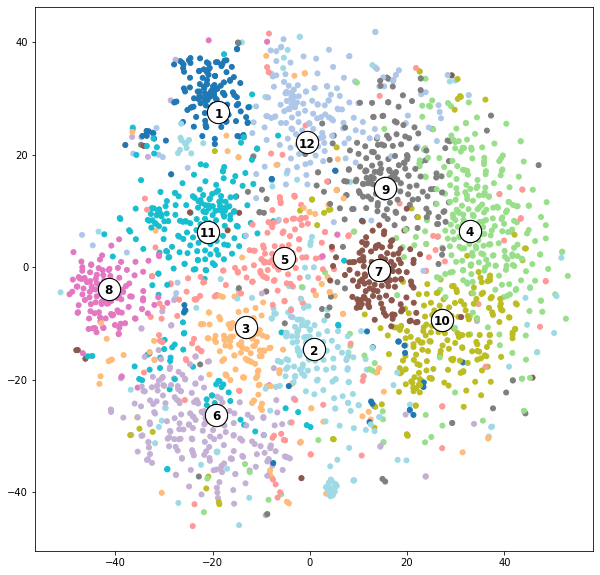

In [26]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm

fig, ax = plt.subplots(1, figsize=(10,10))
# plot data
plt.scatter(x=vector_list_tsne[:len(vector_list),0], y=vector_list_tsne[:len(vector_list),1], c=predictions, cmap=plt.get_cmap('tab20'), alpha = 1, s=25)
plt.scatter(x=vector_list_tsne[len(vector_list):,0], y=vector_list_tsne[len(vector_list):,1], c='black', alpha = 0.95, s=500)
plt.scatter(x=vector_list_tsne[len(vector_list):,0], y=vector_list_tsne[len(vector_list):,1], c='w', alpha = 1, s=400)
for i, cluster in enumerate(vector_list_tsne[len(vector_list):]):
    num = i + 1
    
    if num == 2:
        num = 12
    elif num == 12:
        num = 2
    
    plt.annotate(num, alpha=1, xy=(cluster[0], cluster[1]), xytext=(0, -2), weight='bold',
                 textcoords='offset points', ha='center', va='center', size=12)
            
# title and labels
# plt.title('Clustering\n', fontsize=22)
# plt.axis('off')
plt.savefig("clustering.svg", bbox_inches='tight')

In [24]:
cluster_vectors = []

for cluster in range(len(cluster_centers)):
    print(cluster + 1)
    counter = 20
    
    cluster_x_vectors = []
    
    for idx, label in enumerate(predictions):
        if label == cluster:
            cluster_x_vectors += [sentence_vector_list[idx]]
            
            if counter > 0:
                print(sentence_vector_list[idx][0], end = ', ')
                
            counter -= 1
    
    cluster_vectors += [cluster_x_vectors]
            
    print('\n')

1
dochter, zusters, kinderen, meid, meisje, meisjes, jongens, mam, gevangenis, man, hondjes, mevrouw, zus, moeder, familie, vrienden, bekenden, zuster, begrafenis, bruiloft, 

2
dinge, meneer, beetje, rest, zin, voetbal, lol, dinges, ding, blablabla, evengoed, futiliteiten, centen, foutje, ma, lui, cirkeltje, goh, he, benden, 

3
keer, begin, bed, uur, dag, maanden, middag, week, uitje, avond, tijd, telefoontje, maand, gesprekje, boodschappen, vakantie, smorgens, avonddienst, rust, klok, 

4
orde, bedoeling, beslissing, uitstel, plaats, ervaring, verloop, aangelegenheid, privacy, systeem, ruimte, informatie, plan, discussie, probleem, feit, principe, kwaliteit, name, structuur, 

5
ietjes, paar, priv, gemak, mailtje, helft, code, dingetjes, lijst, banden, pomp, cijfer, voorbeeldje, plaatsen, lijnen, cli, filmpjes, doseren, prijzen, prijs, 

6
kamer, buurt, deur, ambulance, spullen, rollator, huis, kamertje, huisje, appartement, appartementen, kamers, bedden, eenpersoons, ruimtes, gang,

In [20]:
for cluster_idx, cluster in enumerate(cluster_vectors):
    print(len(cluster))

156
187
176
321
204
220
146
133
211
221
235
230


In [21]:
def get_occur(el):
    return keyword_index.get(el[0])

def get_length(el):
    return -keyword_index.get(el[0])

for cluster_idx, cluster in enumerate(cluster_vectors):
    print(cluster_idx + 1, end = ', , ')
    total_occurances = map(get_occur, cluster)
    num_total_occurances = np.sum(list(total_occurances))
    print(num_total_occurances, end = ', , ')
    print(num_total_occurances / len(cluster), end = ', , ')
    cluster.sort(key=get_length)
    for idx in range(15):
        print(cluster[idx][0], end = ' ')
        
    print()

1, , 1995, , 12.788461538461538, , moeder mevrouw familie kinderen man dochter vrouw vader zoon mam zus kind collega meisjes broer 
2, , 868, , 4.641711229946524, , beetje zin rest meneer ding s he geld oke hoop grapje hobby ruzie lach woord 
3, , 2175, , 12.357954545454545, , dag keer uur tijd bed week begin dagen avond rust avonds middag wc maanden ochtend 
4, , 1072, , 3.339563862928349, , jaren antwoord vraag geval probleem plaats situatie ruimte aantal keuze deel problemen principe rekening verschil 
5, , 525, , 2.573529411764706, , paar cijfer tv dingetjes gemak computer mail telefoon cli kleuren kaart films mailtje lijnen horloge 
6, , 1106, , 5.027272727272727, , huis kamer rolstoel woonkamer deur huiskamer restaurant gang bewoner auto toilet plek rollator lift spullen 
7, , 423, , 2.8972602739726026, , ziekenhuis pijn last dokter medicatie therapie medicijnen arts psycholoog ziekte fysio huisarts tabletten ziektebeeld opname 
8, , 527, , 3.962406015037594, , eten koffie tafel 